**1. Import Dependencies and Data**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


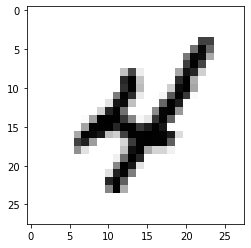

In [ ]:
plt.imshow(x_train[9],cmap=plt.cm.binary)

**2. Build and Compile Model**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

**3. Fit, Predict, and Evaluate**

In [ ]:
%%time
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4668 - accuracy: 0.8638
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1540 - accuracy: 0.9545
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0857 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9767
CPU times: user 26.1 s, sys: 2.23 s, total: 28.3 s
Wall time: 22.8 s


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0711 - accuracy: 0.9793


[0.07114021480083466, 0.9793000221252441]

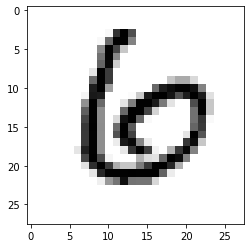

In [ ]:
plt.imshow(x_test[11].reshape(28, 28),cmap=plt.cm.binary)

In [ ]:
y_test[11]

6

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
#model.predict(x_test[2:3])
probabilities=probability_model(x_test[11].reshape(-1, 28,28))
print(probabilities)

tf.Tensor(
[[1.4011154e-04 3.4485403e-08 1.3688982e-05 9.9163453e-06 2.6567079e-06
  3.7193480e-05 9.9832863e-01 1.2444119e-06 1.4663938e-03 6.3242567e-08]], shape=(1, 10), dtype=float32)


In [ ]:
pred_classes = np.argmax(probabilities)

In [ ]:
print(pred_classes)

6
